In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from PIL import Image
from glob import glob

In [2]:
# load the data
data = np.load('./crop/data_notmalized.npz',allow_pickle=True)

In [3]:
data.files

['arr_0', 'arr_1']

In [4]:
X = data['arr_0'] # independent variables or features
y = data['arr_1'] # dependent variable

In [5]:
X.shape , y.shape

((38, 10000), (38,))

In [6]:
X

array([[0.49019608, 0.54117647, 0.56078431, ..., 0.19215686, 0.14117647,
        0.12156863],
       [0.79215686, 0.81176471, 0.82352941, ..., 0.        , 0.        ,
        0.        ],
       [0.43921569, 0.42745098, 0.41960784, ..., 0.12156863, 0.11764706,
        0.11764706],
       ...,
       [0.85098039, 0.83529412, 0.89019608, ..., 0.21568627, 0.30980392,
        0.34117647],
       [0.25098039, 0.25882353, 0.25490196, ..., 0.27843137, 0.23529412,
        0.23921569],
       [0.8       , 0.81176471, 0.81176471, ..., 0.7254902 , 0.72941176,
        0.70196078]])

In [7]:
X1 = X - X.mean(axis = 0)

In [8]:
from sklearn.decomposition import PCA

In [9]:
pca = PCA(n_components=None, whiten=True,svd_solver='auto')

In [10]:
x_pca = pca.fit_transform(X1)

In [11]:
eigen_ratio = pca.explained_variance_ratio_
eigen_cum = np.cumsum(eigen_ratio)

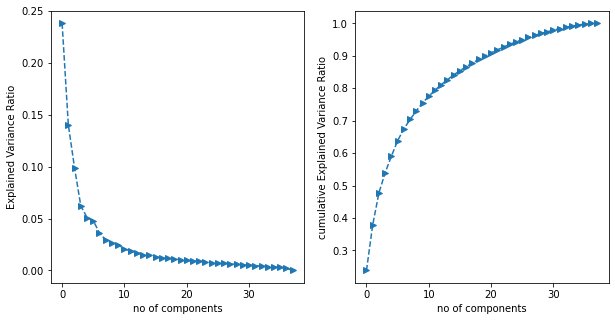

In [12]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.plot(eigen_ratio[:200],'>--')
plt.xlabel('no of components')
plt.ylabel('Explained Variance Ratio')
plt.subplot(1,2,2)
plt.plot(eigen_cum[:200],'>--')
plt.xlabel('no of components')
plt.ylabel('cumulative Explained Variance Ratio')
plt.show()

In [58]:
pca_20 = PCA(n_components=10, whiten=True,svd_solver='auto')
x_pca_20 = pca_20.fit_transform(X1)

In [59]:
x_pca_20.shape

(38, 10)

In [60]:
#saving pca
import pickle
pickle.dump(pca_20,open('./crop/pca_25.pickle','wb'))

In [61]:
# consider 25 components and inverse transform

x_pca_inv = pca_20.inverse_transform(x_pca_20)
x_pca_inv.shape

(38, 10000)

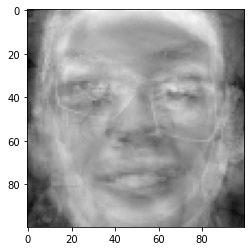

In [62]:
eigen_image = x_pca_inv[0,:]
eigen_image = eigen_image.reshape((100,100))
plt.imshow(eigen_image,cmap='gray')

In [63]:
# saving
np.savez("./crop/data_pca_25_y_mean.pickle",x_pca_20,y,X.mean(axis=0))